# K-Nearest Neighbors: a sample is classified by a popularity vote of its nearest neighbors.

Consider an example with 2 classes and a 2-dimensional feature vector:
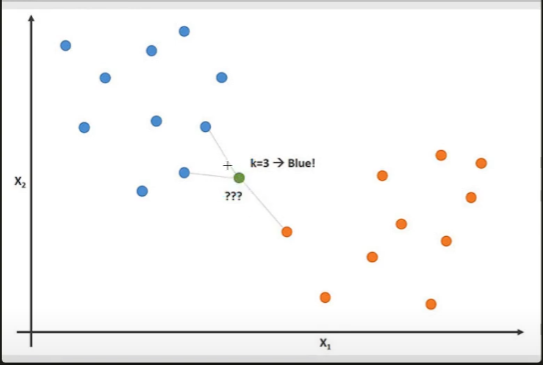

We have 2 classes - Blue and Orange, and feature vectors with 2 dimensions -$x_1, x_2$.

=> We have some training samples, and for each new sample that we wish to classify, we calculate the distance of the new sample to each of the training samples, look at the nearest neighbors (e.g. k=3), and then we choose/predict the label based on the most common class label in the neighborhod, e.g. Blue in the example above.

=> We use the Euclidean distance to compute distances between points $x,y \in \mathbb{R}^{n}$:

$d(x,y)= \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \in \mathbb{R}$

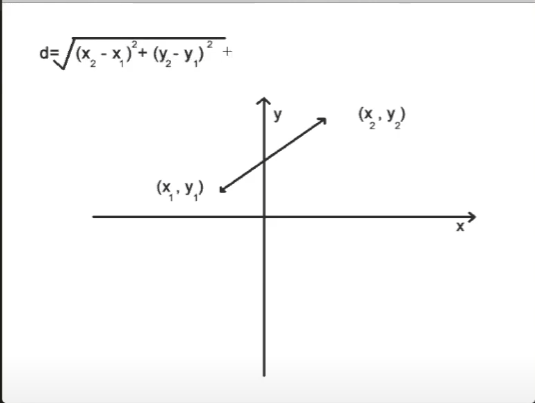

In [15]:
import numpy as np
from collections import Counter

# Defining a KNN class:

# global function for Euclidean distance computation for 2 feature vectors:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))


class KNN:

  # k is the number of nearest neighbors we wish to consider, the default will be 3
  def __init__(self, k: int = 3):
    self.k = k

  # following the conventions of other ml libraries, e.g. scikit-learn, we create a fit() method:
  def fit(self, X, y):
    # in the knn algorithm, there is not training step
    # we store the training samples and use them later:
    self.X_train = X
    self.y_train = y

  # predict new samples
  # can get multiple samples:
  def predict(self, X):
    # write a helper method
    # for each of the samples, we want to get the predicted labels by calling the helper function in the list comprehension
    predicted_labels = [self._predict(x) for x in X]
    # convert it into an np array and return:
    return np.array(predicted_labels)

  # only gets one sample at a time
  def _predict(self,x):
    '''
    We calculate all of the distances and consider the nearest neighbors,
    perform a majority vote an choose the most common neighbor class
    '''

    # compute distances
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # get k nearest neighbors (samples), labels
    # sort our distances:
    # np.argsort will sort the distances and returns the indices of how the sorting was done
    k_indices = np.argsort(distances)[:self.k]
    # labels:
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote, most common class label
    most_common = Counter(k_nearest_labels).most_common(1) # Only one most common, if set to 0 then empty, 2 then the 2 most common, etc
    return most_common[0][0]

# DONE !

In [12]:
# illustration of collections Counter
a = [1,1,1,2,2,3,4,5,6]
most_common = Counter(a).most_common(2)
print(most_common)
# we get a tuple of the most common item, its counts

[(1, 3), (2, 2)]


In [1]:
# inspecting sample data:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

In [2]:
print(f'Shape of sample X_train: {X_train.shape}')
print(f'1st sample in X_train: {X_train[0]}')

Shape of sample X_train: (120, 4)
1st sample in X_train: [5.1 2.5 3.  1.1]


In [3]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


In [4]:
print(f'Shape of sample y_train: {y_train.shape}')
print(f'1st label in y_train: {y_train[0]}')

Shape of sample y_train: (120,)
1st label in y_train: 1


In [5]:
print(X_train.dtype)
print(y_train.dtype)

float64
int64


In [6]:
print(np.unique(y_train, return_counts= True))

(array([0, 1, 2]), array([41, 37, 42]))


# Data overview:
In conclusion, we have a dataset of **120 samples of 4 dimensions**, each belonging to one of the **3 classes**. The data is stored in numpy arrays, and is about evenly distributed in terms of its classes. Below, we plot a 2 dimensional scatterplot using only the first 2 features, for the sake of visualizing a lower dimensional distribution of the points:

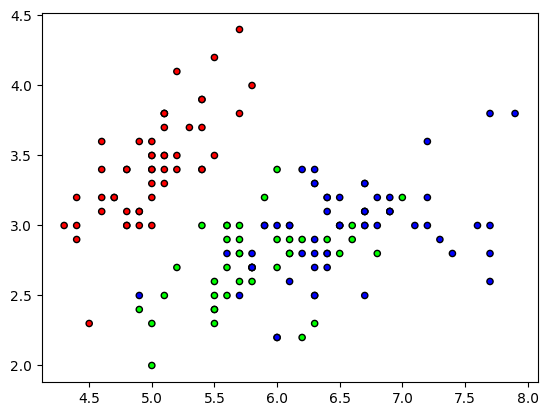

In [7]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap = cmap, edgecolor = 'k', s = 20)
plt.show()

# Using the KNN class on our data:

In [16]:
classifier = KNN(k=3)

# first call the fit method
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# computing the accuracy:
# how many of the predictions are correct/incorrect
accuracy = np.sum(predictions == y_test)/ len(y_test) # for each correct prediction this adds one, then we divide the sum by the number of test samples
print(accuracy)

1.0


# We correctly classify 100% of the data !

In [20]:
# let's use a different number of neighbors:
# usually, we use an odd number of neighbors:
classifier = KNN(k=4)

# first call the fit method
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# computing the accuracy:
# how many of the predictions are correct/incorrect
accuracy = np.sum(predictions == y_test)/ len(y_test) # for each correct prediction this adds one, then we divide the sum by the number of test samples
print(accuracy)

1.0


In [21]:
classifier = KNN(k=5)

# first call the fit method
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# computing the accuracy:
# how many of the predictions are correct/incorrect
accuracy = np.sum(predictions == y_test)/ len(y_test) # for each correct prediction this adds one, then we divide the sum by the number of test samples
print(accuracy)

0.9666666666666667


In [22]:
classifier = KNN(k=6)

# first call the fit method
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# computing the accuracy:
# how many of the predictions are correct/incorrect
accuracy = np.sum(predictions == y_test)/ len(y_test) # for each correct prediction this adds one, then we divide the sum by the number of test samples
print(accuracy)

1.0


In [23]:
classifier = KNN(k=7)

# first call the fit method
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# computing the accuracy:
# how many of the predictions are correct/incorrect
accuracy = np.sum(predictions == y_test)/ len(y_test) # for each correct prediction this adds one, then we divide the sum by the number of test samples
print(accuracy)

0.9666666666666667
